# Big Data Final Project - Rajeshwari Rudravaram

In [0]:
# fetching the text data from url
import urllib.request 
stringInURL = "https://www.gutenberg.org/cache/epub/7213/pg7213.txt"
urllib.request.urlretrieve(stringInURL,"/tmp/lifeandwork.txt")


Out[5]: ('/tmp/lifeandwork.txt', <http.client.HTTPMessage at 0x7f5f31d42940>)

In [0]:

# moved file from temp folder to databricks storage folder of dbfs
dbutils.fs.mv("file:/tmp/lifeandwork.txt","dbfs:/data/lifeandwork.txt")

Out[6]: True

In [0]:
# transfer the data file into Spark
lifeandworkRawRDD= sc.textFile("dbfs:/data/lifeandwork.txt")

# Cleaning the data

In [0]:
# separating the words from each using flatmap function
# changing all the words to lower case and then removing the spaces between them
lifeandworkMessyTokensRDD = lifeandworkRawRDD.flatMap(lambda eachLine: eachLine.lower().strip().split(" "))

In [0]:
# removing punctuations
# importing regular expression library
import re
wordsAfterCleanedTokensRDD = lifeandworkMessyTokensRDD.map(lambda letter: re.sub(r'[^A-Za-z]', '', letter))

In [0]:
# removing all the stop words from the data using filter function
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()
lifeAndWorkWordsRDD = wordsAfterCleanedTokensRDD.filter(lambda word: word not in stopwords)

In [0]:
# removing all the empty spaces from the data
lifeAndWorkRemoveSpaceRDD = lifeAndWorkWordsRDD.filter(lambda x: x != "")

## Processing the data

In [0]:
# map() words to (word,1) immediate key-value pairs
lifeAndWorkPairsRDD = lifeAndWorkRemoveSpaceRDD.map(lambda eachWord: (eachWord,1))

In [0]:
# transforming the words using reduceByKey() to get (word,count) results
lifeAndWorkWordCountRDD = lifeAndWorkPairsRDD.reduceByKey(lambda acc, value: acc + value)

In [0]:
#collect() action to get back to python
results = lifeAndWorkWordCountRDD.collect()
print(results)

[('project', 39), ('gutenberg', 28), ('ebook', 33), ('work', 403), ('henry', 13), ('copyright', 10), ('world', 110), ('sure', 14), ('check', 7), ('country', 78), ('downloading', 1), ('seen', 14), ('viewing', 1), ('remove', 5), ('change', 36), ('edit', 1), ('read', 10), ('legal', 15), ('print', 10), ('specific', 6), ('restrictions', 2), ('may', 183), ('used', 79), ('make', 189), ('free', 17), ('vanilla', 1), ('texts', 2), ('computers', 1), ('prepared', 3), ('volunteers', 2), ('title', 11), ('january', 16), ('yes', 6), ('year', 78), ('schedule', 7), ('edition', 2), ('language', 1), ('start', 32), ('produced', 12), ('marvin', 2), ('tom', 5), ('allen', 4), ('eric', 2), ('franks', 2), ('team', 3), ('samuel', 1), ('crowther', 1), ('contents', 2), ('idea', 97), ('business', 415), ('iii', 2), ('starting', 10), ('iv', 2), ('secret', 4), ('manufacturing', 57), ('getting', 42), ('production', 161), ('vi', 2), ('terror', 2), ('machine', 69), ('always', 129), ('good', 151), ('things', 73), ('money', 261), ('goods', 30), ('xiii', 2), ('poor', 25), ('xiv', 2), ('power', 102), ('farming', 31), ('charity', 30), ('introduction', 5), ('started', 32), ('development', 29), ('yet', 42), ('wonderful', 4), ('progress', 40), ('scratch', 1), ('compare', 2), ('past', 21), ('consider', 16), ('ploughing', 11), ('soil', 1), ('put', 104), ('inkling', 2), ('opportunity', 28), ('countries', 4), ('ferment', 1), ('excellent', 5), ('suggest', 4), ('something', 88), ('speaks', 1), ('cold', 6), ('away', 54), ('flowers', 2), ('birds', 15), ('green', 3), ('fields', 9), ('metal', 12), ('human', 56), ('think', 76), ('know', 90), ('use', 93), ('understand', 15), ('mechanical', 8), ('already', 23), ('toward', 27), ('banishing', 1), ('living', 47), ('providing', 5), ('means', 62), ('useful', 20), ('set', 30), ('us', 112), ('live', 32), ('end', 38), ('bear', 9), ('name', 17), ('take', 106), ('evidence', 7), ('working', 61), ('looks', 8), ('making', 97), ('commercial', 8), ('success', 20), ('motor', 79), ('unusual', 2), ('way', 131), ('right', 70), ('considered', 24), ('solely', 12), ('prevailing', 1), ('society', 19), ('beaten', 5), ('selfishly', 2), ('ask', 8), ('service', 118), ('best', 86), ('encourages', 4), ('kind', 80), ('keeps', 7), ('full', 32), ('matter', 54), ('planning', 9), ('quarrel', 1), ('attitude', 8), ('new', 112), ('skeptical', 1), ('insist', 5), ('upon', 61), ('rather', 29), ('rush', 4), ('around', 40), ('continuous', 9), ('mean', 22), ('cautiousness', 1), ('balance', 12), ('civilization', 7), ('acute', 1), ('troubles', 4), ('arise', 3), ('carefully', 11), ('investigating', 1), ('discover', 25), ('extraordinarily', 6), ('counts', 6), ('developing', 4), ('interested', 13), ('capable', 8), ('applicationthat', 1), ('form', 19), ('universal', 17), ('quite', 41), ('certain', 63), ('thoroughly', 10), ('accepted', 7), ('recognize', 9), ('prosperity', 16), ('happiness', 2), ('obtained', 3), ('escape', 3), ('suggestion', 6), ('goes', 30), ('beyond', 18), ('accepting', 2), ('fullest', 5), ('must', 112), ('result', 30), ('forehandedly', 1), ('common', 17), ('reformer', 8), ('attempt', 16), ('pay', 77), ('two', 79), ('calls', 4), ('wants', 27), ('shirt', 1), ('never', 106), ('occur', 3), ('enlarge', 4), ('circumstances', 13), ('reform', 5), ('go', 85), ('presence', 4), ('outfits', 1), ('opened', 6), ('eyes', 6), ('realized', 6), ('independence', 3), ('look', 19), ('critically', 1), ('masterful', 1), ('position', 21), ('critic', 2), ('social', 28), ('assumeis', 1), ('unbalancing', 1), ('young', 16), ('strongly', 1), ('managed', 20), ('destructive', 5), ('action', 5), ('decree', 1), ('ruthlessly', 2), ('czars', 1), ('vetoed', 1), ('soviet', 1), ('labour', 73), ('say', 61), ('describe', 3), ('united', 25), ('workman', 27), ('eight', 23), ('hours', 36), ('twelve', 13), ('wishes', 1), ('week', 13), ('able', 59), ('afford', 7), ('prevent', 9), ('citizen', 6), ('discipline', 6), ('treated', 5), ('alike', 13), ('decent', 6), ('length', 4), ('details', 6), ('items', 4), ('r

In [0]:
sorted(results, key=lambda t: t[1], reverse=True)[:10]


Out[28]: [('one', 448),
 ('business', 415),
 ('work', 403),
 ('man', 321),
 ('men', 313),
 ('money', 261),
 ('time', 196),
 ('made', 192),
 ('make', 189),
 ('may', 183)]

In [0]:
output = sorted(results, key=lambda t: t[1], reverse=True)[:15]
print(output)

[('one', 448), ('business', 415), ('work', 403), ('man', 321), ('men', 313), ('money', 261), ('time', 196), ('made', 192), ('make', 189), ('may', 183), ('car', 176), ('every', 169), ('production', 161), ('get', 160), ('much', 159)]

## Charting the data

Out[35]:

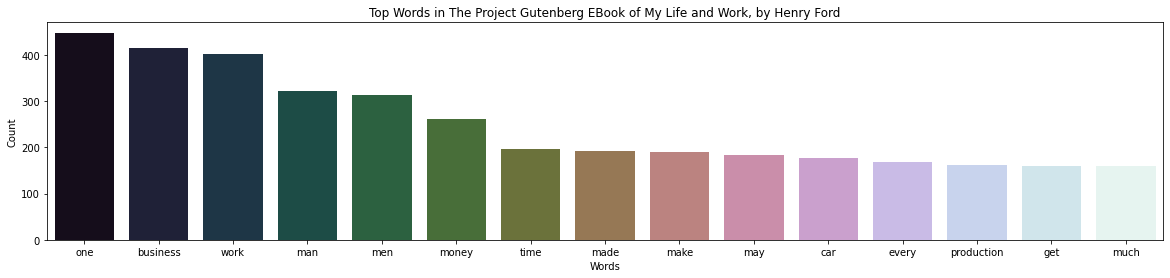

Text(0.5, 1.0, 'Top Words in The Project Gutenberg EBook of My Life and Work, by Henry Ford')

In [0]:
# Displaying the obtained results
# importing all the libraries to plot the graph
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns

# preparing chart information
source = 'The Project Gutenberg EBook of My Life and Work, by Henry Ford'
title = 'Top Words in ' + source
xlabel = 'Words'
ylabel = 'Count'

df = pd.DataFrame.from_records(output, columns =[xlabel, ylabel]) 
plt.figure(figsize=(20,4))
sns.barplot(xlabel, ylabel, data=df, palette="cubehelix").set_title(title)

In [0]:
pip install wordcloud #installing the wordcloud

Python interpreter will be restarted.
Requirement already satisfied: wordcloud in /local_disk0/.ephemeral_nfs/envs/pythonEnv-76049771-1655-4093-b29c-82e8c1a5d667/lib/python3.8/site-packages (1.8.1)
Requirement already satisfied: pillow in /local_disk0/.ephemeral_nfs/envs/pythonEnv-76049771-1655-4093-b29c-82e8c1a5d667/lib/python3.8/site-packages (from wordcloud) (8.2.0)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: six in /usr/local/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->wordcloud) (1.15.0)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-76049771-1655-4093-b29c-82e8c1a5d667/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
# installing the natural language tool kit
pip install nltk


File "<command-3001626945718825>" , line 2 
 pip install nltk 
 ^
 SyntaxError : invalid syntax

In [0]:
import nltk
nltk.download('popular') # nltk a library that takes in the list of words and outputs a popular word cloud image.

[nltk_data] Downloading collection 'popular'
[nltk_data] | 
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Package cmudict is already up-to-date!
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Package gazetteers is already up-to-date!
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Package genesis is already up-to-date!
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Package gutenberg is already up-to-date!
[nltk_data] | Downloading package inaugural to /root/nltk_data...
[nltk_data] | Package inaugural is already up-to-date!
[nltk_data] | Downloading package movie_reviews to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package movie_reviews is already up-to-date!
[nltk_data] | Downloading package names to /root/nltk_data...
[nltk_data] | Package names is already up-to-date!
[nltk_data] | Downloading package shakespeare to /root/nltk_data...
[nltk_data] | Package shakespeare is already up-to-date!
[nltk_data] | Downloading package stopwords to /root/nltk_data...
[nltk_data] | Package stopwords is already up-to-date!
[nltk_data] | Downloading package treebank to /root/nltk_data...
[nltk_data] | Package treebank is already up-to-date!
[nltk_data] | Downloading package twitter_samples to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package twitter_samples is already up-to-date!
[nltk_data] | Downloading package omw to /root/nltk_data...
[nltk_data] | Package omw is already up-to-date!
[nltk_data] | Downloading package wordnet to /root/nltk_data...
[nltk_data] | Package wordnet is already up-to-date!
[nltk_data] | Downloading package wordnet_ic to /root/nltk_data...
[nltk_data] | Package wordnet_ic is already up-to-date!
[nltk_data] | Downloading package words to /root/nltk_data...
[nltk_data] | Package words is already up-to-date!
[nltk_data] | Downloading package maxent_ne_chunker to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package maxent_ne_chunker is already up-to-date!
[nltk_data] | Downloading package punkt to /root/nltk_data...
[nltk_data] | Package punkt is already up-to-date!
[nltk_data] | Downloading package snowball_data to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package snowball_data is already up-to-date!
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package averaged_perceptron_tagger is already up-
[nltk_data] | to-date!
[nltk_data] | 
[nltk_data] Done downloading collection popular
Out[2]: True

Preprocessed Data: ﻿the project gutenberg ebook life work , henry ford copyright laws changing world sure check copyright laws country downloading redistributing project gutenberg ebook header first thing seen viewing project gutenberg file please remove change edit header without written permission please read `` legal small print , '' information ebook project gutenberg bottom file included important information specific rights restrictions file may used also find make donation project gutenberg , get involved * * welcome world free plain vanilla electronic texts * * * * ebooks readable humans computers , since 1971 * * * * * * * ebooks prepared thousands volunteers ! * * * * * title : life work author : henry ford release date : january , 2005 [ ebook # 7213 ] [ yes , one year ahead schedule ] [ file first posted march 27 , 2003 ] edition : 10 language : english * * * start project gutenberg ebook life work * * * produced marvin hodges , tom allen , tonya allen , eric eldred , charles franks , dp team life work henry ford collaboration samuel crowther contents introduction -- idea ? beginning ii learned business iii starting real business iv secret manufacturing serving v getting production vi machines men vii terror machine viii wages ix always good business ? x cheaply things made ? xi money goods xii money -- master servant ? xiii poor ? xiv tractor power farming xv charity ? xvi railroads xvii things general xviii democracy industry xix may expect index introduction idea ? started development country -- yet , talk wonderful progress , done scratch surface progress wonderful enough -- compare done , past accomplishments nothing consider power used merely ploughing soil used industrial establishments country put together , inkling comes much opportunity ahead , many countries world ferment much unrest every , excellent time suggest something things may done light done one speaks increasing power , machinery , industry comes picture cold , metallic sort world great factories drive away trees , flowers , birds , green fields shall world composed metal machines human machines agree think unless know machines use , unless better understand mechanical portion life , time enjoy trees , birds , flowers , green fields think already done much toward banishing pleasant things life thinking opposition living providing means living waste much time energy little left enjoy power machinery , money goods , useful set us free live means end instance , consider machines bear name simply machines would something else take concrete evidence working theory business , hope something theory business -- theory looks toward making world better place live fact commercial success ford motor company unusual important serves demonstrate , way one fail understand , theory date right considered solely light criticize prevailing system industry organization money society standpoint one beaten things organized , could , thinking selfishly , ask change merely want money present system right ; gives money plenty thinking service present system permit best service encourages every kind waste -- keeps many men getting full return service going nowhere matter better planning adjustment quarrel general attitude scoffing new ideas better skeptical new ideas insist upon shown rather rush around continuous brainstorm every new idea skepticism , mean cautiousness , balance wheel civilization present acute troubles world arise taking new ideas without first carefully investigating discover good ideas idea necessarily good old , necessarily bad new , old idea works , weight evidence favor ideas extraordinarily valuable , idea idea almost one think idea thing counts developing practical product interested fully demonstrating ideas put practice capable largest application -- nothing peculiarly motor cars tractors form something nature universal code quite certain natural code want demonstrate thoroughly accepted , new idea , natural code natural thing work -- recogni

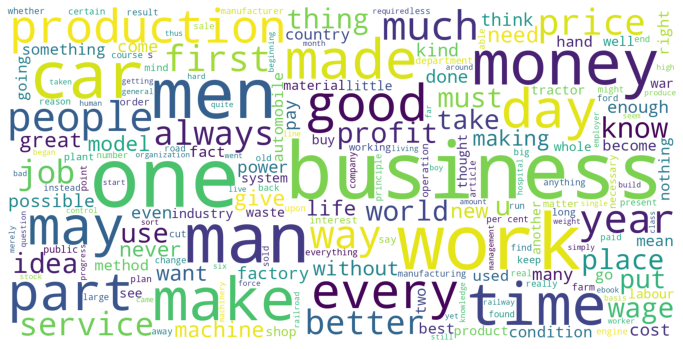

In [0]:
# importing all the required libraries
import matplotlib.pyplot as plt
import nltk
import wordcloud
from nltk.corpus import stopwords # to remove the stopwords from the data
from nltk.tokenize import word_tokenize #  breaking down the text into smaller units called tokens
from wordcloud import WordCloud # creating an image using words in the data

# defining the functions to process the data
class WordCloudGeneration:
    def preprocessing(self, data):
        # convert all words to lowercase
        data = [item.lower() for item in data]
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data

    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="white").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

wordcloud_generator = WordCloudGeneration()
# you may uncomment the following line to use custom input
# input_text = input("Enter the text here: ")
import urllib.request
url = "https://www.gutenberg.org/cache/epub/7213/pg7213.txt"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
input_text = response.read().decode('utf-8')

input_text1 = input_text.split('.')
clean_data = wordcloud_generator.preprocessing(input_text1)
wordcloud_generator.create_word_cloud(clean_data)
